In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Setting display options for better readability
pd.set_option('display.max_columns', None)

# Loading the dataset
df = pd.read_csv('AmesHousing.csv')

# Displaying the first five rows
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


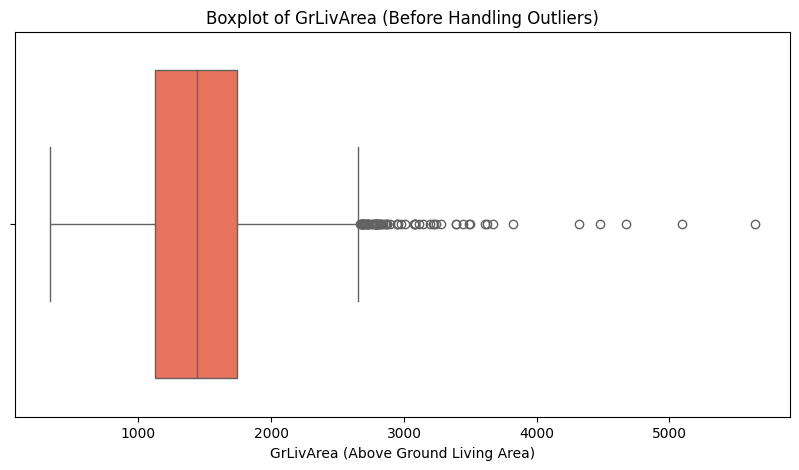

In [3]:
# Visualizing Outliers with a Boxplot (GrLivArea)

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Gr Liv Area'], color='tomato')
plt.title("Boxplot of GrLivArea (Before Handling Outliers)")
plt.xlabel("GrLivArea (Above Ground Living Area)")

plt.show()

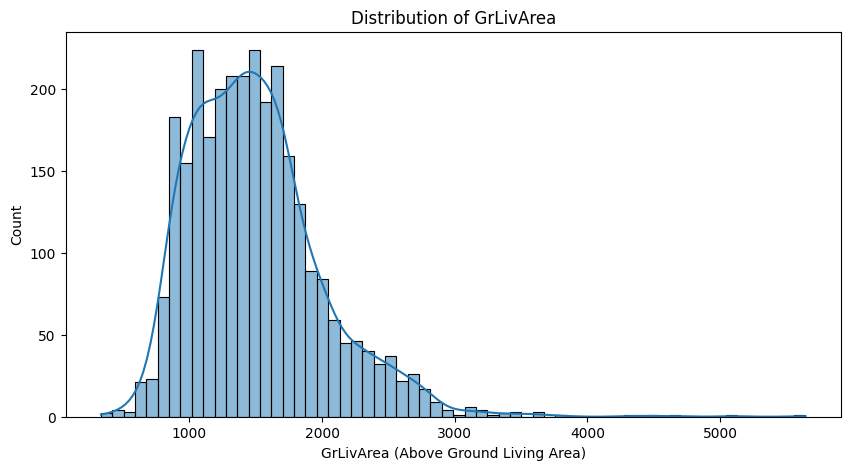

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Gr Liv Area'], kde=True)
plt.title("Distribution of GrLivArea")
plt.xlabel("GrLivArea (Above Ground Living Area)")


plt.show()

#### Insight:
The distribution is right-skewed and contains several extremely high-value points.<br>
These outliers may disproportionately influence model training, so we will detect <br>and handle them using statistical methods (Z-score / IQR) next.

In [5]:
print(df['Gr Liv Area'].describe())
print("Skewness:", df['Gr Liv Area'].skew())

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr Liv Area, dtype: float64
Skewness: 1.2741097164955077


- **Skewness = 0:** The distribution is approximately symmetric.
- **Skewness > 0:** The distribution is right-skewed with a longer right tail and larger high-end values.
- **Skewness < 0:** The distribution is left-skewed with a longer left tail.


## Outlier Handling: Z-Score, IQR & Winsorization

### 1️⃣ Z-Score Method

The Z-score measures how many standard deviations a data point is from the mean.
For normally distributed data, values with |Z-score| > 3 are considered outliers.

**Assumption:**
This method assumes an approximately normal distribution and may be unreliable for highly skewed data.

**Action:**
Rows with |Z-score| > 3 were removed to reduce the influence of extreme values.

**Next:**
Since real-world data is often skewed, the IQR method is applied next.


In [6]:
# Z-Score Method for Outlier Detection
# Calculate absolute Z-scores for GrLivArea

z_scores = np.abs(stats.zscore(df['Gr Liv Area']))

In [7]:
# Display first few Z-scores

z_scores[:10]

array([0.30926506, 1.19442705, 0.33771825, 1.20752324, 0.25584442,
       0.20638086, 0.31991137, 0.43466682, 0.23012337, 0.60208931])

In [8]:
# Keep only observations within 3 standard deviations
df_z = df[z_scores < 3]

print("Original shape:", df.shape)
print("After Z-score filtering:", df_z.shape)

Original shape: (2930, 82)
After Z-score filtering: (2905, 82)


### 2️⃣ IQR (Interquartile Range) Method

IQR is a robust method for detecting outliers using the middle 50% of the data (Q1 to Q3).
Values outside the range **[Q1 − 1.5×IQR, Q3 + 1.5×IQR]** are treated as outliers.

**Assumption:** IQR does not require normality and works well for skewed distributions.<br>
**Action:** Rows outside the IQR bounds were removed to reduce the influence of extreme values.


In [9]:
# IQR (Interquartile Range) Method for Outliers

col = 'Gr Liv Area'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
# Keep only non-outlier rows
df_iqr = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [11]:
print("Original shape:", df.shape)
print("After IQR filtering:", df_iqr.shape)

Original shape: (2930, 82)
After IQR filtering: (2855, 82)


### 3️⃣ Winsorization (Capping Method)

Winsorization reduces the effect of outliers by **capping** extreme values instead of removing rows.
Here, the lowest 5% and highest 5% of values are replaced with the nearest remaining boundary values.

**Assumption:** Useful when outliers may be valid observations but should not dominate the model.
**Action:** Applied 5% capping on both ends to stabilize the feature distribution.


In [12]:
from scipy.stats.mstats import winsorize

# Capping the extreme 5% on both ends

df['Gr Liv Area'] = winsorize(df['Gr Liv Area'], limits=[0.05, 0.05])

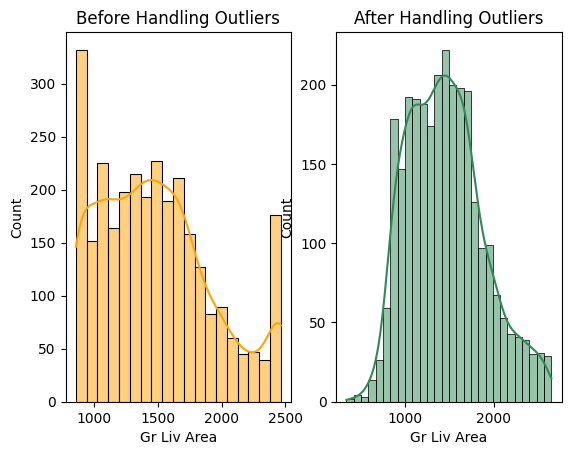

In [13]:
# Before
plt.subplot(1, 2, 1)
sns.histplot(df['Gr Liv Area'], kde=True, color='orange')
plt.title("Before Handling Outliers")


# After (IQR)
plt.subplot(1, 2, 2)
sns.histplot(df_iqr['Gr Liv Area'], kde=True, color='seagreen')
plt.title("After Handling Outliers")
plt.show()

### ✅ Summary
 - Use **boxplots** for quick visual detection.<br>
 - Use the **Z-score** for normally distributed data.<br>
 - Use **IQR** for skewed distributions.<br>
 - Use **winsorization/capping** when you need to keep all rows but limit extreme values.

### 🧬 Handling Inconsistent Data
 - Inconsistent data entries—like typos, extra spaces, or varying capitalizations—can mislead your analysis, especially in categorical columns. Let’s clean them up!

### 🔍 Common Issues in Text Data:
 - Typos or misspellings<br>
 - Inconsistent use of uppercase/lowercase<br>
 - Leading/trailing whitespaces<br>
 - Mixed formats for similar values

### 🧼 Cleaning Tools in Pandas

In [14]:
# Before cleaning
print(df['Neighborhood'].unique())

['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']


### 🔠 Convert to Lowercase

In [15]:
df['Neighborhood'] = df['Neighborhood'].str.lower()

In [16]:
print(df['Neighborhood'].unique())

['names' 'gilbert' 'stonebr' 'nwames' 'somerst' 'brdale' 'npkvill'
 'nridght' 'blmngtn' 'noridge' 'sawyerw' 'sawyer' 'greens' 'brkside'
 'oldtown' 'idotrr' 'clearcr' 'swisu' 'edwards' 'collgcr' 'crawfor'
 'blueste' 'mitchel' 'timber' 'meadowv' 'veenker' 'grnhill' 'landmrk']


### ✂️ Remove Extra Whitespace (if any)

In [17]:
# example
df['Neighborhood'] = df['Neighborhood'].str.strip()

In [18]:
print(df['Neighborhood'].unique())

['names' 'gilbert' 'stonebr' 'nwames' 'somerst' 'brdale' 'npkvill'
 'nridght' 'blmngtn' 'noridge' 'sawyerw' 'sawyer' 'greens' 'brkside'
 'oldtown' 'idotrr' 'clearcr' 'swisu' 'edwards' 'collgcr' 'crawfor'
 'blueste' 'mitchel' 'timber' 'meadowv' 'veenker' 'grnhill' 'landmrk']


### 🔁 Replacing Values
#### Fixes typos and standardizes naming.

In [19]:
df['Neighborhood'] = df['Neighborhood'].replace({
    'collgcr': 'collgcr',  # correct typo if needed. this is just example
    'collgr': 'collgcr'
})

In [20]:
# After cleaning
df['Neighborhood'] = df['Neighborhood'].str.lower().str.strip()
print(df['Neighborhood'].unique())

['names' 'gilbert' 'stonebr' 'nwames' 'somerst' 'brdale' 'npkvill'
 'nridght' 'blmngtn' 'noridge' 'sawyerw' 'sawyer' 'greens' 'brkside'
 'oldtown' 'idotrr' 'clearcr' 'swisu' 'edwards' 'collgcr' 'crawfor'
 'blueste' 'mitchel' 'timber' 'meadowv' 'veenker' 'grnhill' 'landmrk']


### ✅ Summary
 - Always standardize case and spacing before grouping or encoding.<br>
 - Clean categorical variables using .str.lower(), .str.strip(), and .replace().<br>
 - This step avoids silent grouping errors and improves model performance.

### 📐 5. Data Type Conversions
Sometimes, features are stored in incorrect formats—for example, numeric codes stored as strings or date fields <br>stored as plain text.
#### Converting data to the correct type helps:

- Perform accurate analysis<br>
- Apply the right cleaning technique<br>
- Improve model compatibility<br>

In [21]:
# View data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

### 🔄 Convert to Numeric
##### Useful when numbers are stored as strings like "60" instead of 60.

In [22]:
# Convert a column to numeric (if possible), set errors='coerce' to handle invalid entries
df['MS SubClass'] = pd.to_numeric(df['MS SubClass'], errors='coerce')

### 🕒 Convert to Datetime
 - Enables date-based filtering, time difference calculation, etc.

In [23]:
# Convert column to datetime format if needed.
df['Yr Sold'] = pd.to_datetime(df['Yr Sold'], format='%Y')

### 🔤 Convert to Category
 - Speeds up processing and helps encoding later on.

In [24]:
# Convert text column to category type (memory efficient)
df['Neighborhood'] = df['Neighborhood'].astype('category')

### 🧠 Identify Numerical vs Categorical Features

In [25]:
# Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [26]:
num_count = len(numerical_cols)
print(num_count)

38


In [27]:
print(numerical_cols)

['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'SalePrice']


In [28]:
# Categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [29]:
cat_count = len(categorical_cols)
print(cat_count)

43


In [30]:
print(categorical_cols)

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']
